# 文字探勘實作

## 產生 2-gram

In [142]:
input_sentence='那我們酸民婉君也可以報名嗎'

sentence  = input_sentence.decode('utf-8')

for i in range(0, len(sentence) - 2 + 1):
    print sentence[i:i+2]

那我
我們
們酸
酸民
民婉
婉君
君也
也可
可以
以報
報名
名嗎


## 產生 3-gram

In [143]:
for i in range(0, len(sentence) -3 + 1):
    print sentence[i:i+3]

那我們
我們酸
們酸民
酸民婉
民婉君
婉君也
君也可
也可以
可以報
以報名
報名嗎


## 建立 n-gram 函式

In [144]:
def ngram(input_sentence, n = 2):
    word_dic = {}
    sentence  = input_sentence.decode('utf-8')
    for i in range(0, len(sentence) - n + 1):
        if sentence[i:i+n] not in word_dic:
            word_dic[sentence[i:i+n]] = 1
        else:
            word_dic[sentence[i:i+n]] = word_dic[sentence[i:i+n]] + 1
    return word_dic

## 測試 bigram

In [145]:
for word in ngram('酸民婉君也可以報名嗎'):
    print word,

婉君 報名 可以 名嗎 君也 也可 民婉 酸民 以報


## 測試 trigram

In [146]:
for word in ngram('那我們酸民婉君也可以報名嗎?' ,n=3):
    print word

酸民婉
君也可
名嗎?
可以報
也可以
們酸民
以報名
民婉君
報名嗎
那我們
婉君也
我們酸


## 移除標點符號

In [147]:
sentence = '123?'
skip_word = '.?'
len([word for word in sentence if word in skip_word]) > 0

True

In [148]:
skip_dic = '?.,、　「！】？：《」》～【'.decode('utf-8')
def ngram(input_sentence, n = 2, skip_word= skip_dic):
    word_dic = {}
    sentence  = input_sentence.decode('utf-8')
    for i in range(0, len(sentence) - n + 1):
        invalid = len([word for word in sentence[i:i+n] if word in skip_word])
        if sentence[i:i+n] not in word_dic and invalid ==0:
            word_dic[sentence[i:i+n]] = 1
        elif invalid ==0:
            word_dic[sentence[i:i+n]] = word_dic[sentence[i:i+n]] + 1
    return word_dic

In [149]:
for word in ngram('那我們酸民、婉君也可以報名嗎?'):
    print word

我們
婉君
報名
們酸
可以
名嗎
君也
也可
那我
酸民
以報


In [151]:
import sqlite3
db = sqlite3.connect('news.db') 
cur = db.cursor()
cur.execute('select * from news_entry')
allNews = cur.fetchall()
dic = {}
for rec in allNews:
    ngram_dic = ngram(rec[4].encode('utf-8'))
    for ele in ngram_dic:
        if ele not in dic:
            dic[ele] = ngram_dic[ele]
        else:
            dic[ele] = dic[ele] + ngram_dic[ele]
cur.close()
db.close()

In [152]:
import operator
words_freq = sorted(dic.iteritems(),key=operator.itemgetter(1),reverse=True)
    
for word in words_freq:
    if word[1] >= 2:
        print word[0], word[1]

搶先 3
五月 3
八日 3
二十 3
十八 3
月二 3
天找 2
頭條 2
警消 2
山難 2
先報 2
報頭 2
劈腿 2
條搶 2
各報 2


## 長詞優先演算法

## 如何依標點符號切開字詞

In [153]:
import re
delimiter = "，|。|、"  
text = '3年前就讀高雄應用大學二年級的陳顯佳，為閃避跨越雙黃線來車，撞上路邊、摔斷頸椎，頸部以下全癱，嘴被插管，父母每天去看他，他都意識清醒、眨眼流淚，17天後他因頸椎受損抑制呼吸，醫師用盡強力針與電擊都無效，'
for i in re.split(delimiter, text):
    print i

3年前就讀高雄應用大學二年級的陳顯佳
為閃避跨越雙黃線來車
撞上路邊
摔斷頸椎
頸部以下全癱
嘴被插管
父母每天去看他
他都意識清醒
眨眼流淚
17天後他因頸椎受損抑制呼吸
醫師用盡強力針與電擊都無效



## 測試切除效果

In [154]:
def splitSentense(text, delimiter):
    return re.split(delimiter, text)
    
delimiter = "，|。|、|（|）|／|《|》|】|【|「|」|；|：".decode('utf-8')  
db = sqlite3.connect('news.db') 
cur = db.cursor()
cur.execute('select * from news_entry')
allNews = cur.fetchall()
sentenceAry = []
for rec in allNews:
    text = rec[5]
    sentenceAry += splitSentense(text,delimiter)
cur.close()
db.close()

In [155]:
for sentence in sentenceAry[0:8]:
    print sentence

台南市區昨出現大型
尋人啟事
廣告牆
看板用紅色大字寫
市長賴清德與台南市民意已失聯


第142天


## 移除關鍵字

In [156]:
def removeKey(text, keyword):
    textAry= text
    for key in keyword:
        textAry = ''.join(textAry.split(key.decode('utf-8')))
    return textAry
print sentenceAry[0]
print removeKey(sentenceAry[0], ['民進黨', '後天'])

台南市區昨出現大型
台南市區昨出現大型


In [157]:
a = '民進黨後天將公布'.decode('utf-8')
removeKey(a, ['民進黨', '後天'])

u'\u5c07\u516c\u5e03'

## 修改ngram 處理函式

In [158]:
def ngram(input_sentence, n = 2):
    word_dic = {}
    sentence  = input_sentence
    for i in range(0, len(sentence) - n + 1):        
        if sentence[i:i+n] not in word_dic:
            word_dic[sentence[i:i+n]] = 1
        else:
            word_dic[sentence[i:i+n]] = word_dic[sentence[i:i+n]] + 1
    return word_dic

## 依長詞優先產生關鍵字

In [159]:
keywords=[]        
ret_terms={}
words_freq    = []
for term_length in range(4,1,-1):
    word_dic = {}
    for sentence in sentenceAry:
        text_list = removeKey(sentence,keywords)        
        ngram_words = ngram(text_list,term_length) 
        for word in ngram_words:
            if word not in word_dic:
                word_dic[word] = 1
            else:
                word_dic[word] += ngram_words[word]   
    for word in word_dic:
        if word_dic[word] >= 5:
            keywords.append(word.encode('utf-8'))            
            ret_terms.update({word:word_dic[word]})

sorted_terms = sorted(ret_terms.iteritems(),key=operator.itemgetter(1),reverse=True) 
for term in sorted_terms[0:30]:
    print term[0], term[1]

報導 18
表示 17
景氣 15
美國 14
台灣 14
一個 13
萬元 13
警方 13
綜合 13
藍燈 13
國賠 12
綜合報導 12
時間 12
26 11
難民 11
外電報導 10
搜救 10
山難搜救 10
夜店 10
今年 10
合外電報 10
襲擊 10
手機 10
男子 10
生產 10
綜合外電 10
今日出版 9
逮捕 9
日出版的 9
以色列 9


## 使用jieba

In [385]:
import jieba

sentence = "大巨蛋案對市府同仁下封口令？　柯P否認"
words = jieba.cut(sentence, cut_all=False)
for word in words:
    print word

大巨蛋
案對
市府
同仁
下
封口令
？
　
柯P
否認


## 使用jieba 分詞

In [386]:
#encoding=utf-8
import jieba

seg_list = jieba.cut("大巨蛋案對市府同仁下封口令？　柯P否認", cut_all=True)
print "Full Mode:", "/ ".join(seg_list) 

seg_list = jieba.cut("大巨蛋案對市府同仁下封口令？　柯P否認", cut_all=False)
print "Default Mode:", "/ ".join(seg_list) 

Full Mode: 大巨蛋/ 巨蛋/ 案/ 對/ 市府/ 同仁/ 下/ 封口/ 封口令/ 口令/ / / / 柯/ P/ 否/ 認
Default Mode: 大巨蛋/ 案對/ 市府/ 同仁/ 下/ 封口令/ ？/ 　/ 柯P/ 否認


## 使用自訂辭典

In [ ]:
import jieba

jieba.load_userdict("userdict.txt")

## 新增或刪除字詞

In [162]:
import jieba
jieba.add_word('柯P',100, 'nr')
jieba.del_word('柯P')

## 表列詞性

In [387]:
import jieba.posseg as pseg
words = pseg.cut("大巨蛋案對市府同仁下封口令？　柯P否認")
for w in words:
    print w.word, w.flag

大巨蛋 ns
案 ng
對 p
市府 n
同仁 nr
下 f
封口令 n
？ x
　x
柯P nr
否認 v


## 列出關鍵字所在

In [166]:
words = jieba.tokenize(unicode(sentence, 'utf-8'))

for tw in words:
    print tw[0], tw[1], tw[2]

大巨蛋 0 3
案對 3 5
市府 5 7
同仁 7 9
下 9 10
封口令 10 13
？ 13 14
　14 15
柯P 15 17
否認 17 19


## 依詞性切出關鍵詞

In [167]:
import jieba.analyse
tags = jieba.analyse.extract_tags(sentence, 1, allowPOS = ['nr'])
print ",".join(tags)


柯P


## 列出斷詞位置

In [173]:
words = jieba.tokenize(unicode(sentence, 'utf-8'))

for tw in words:
    print tw[0], tw[1], tw[2]

大巨蛋 0 3
案對 3 5
市府 5 7
同仁 7 9
下 9 10
封口令 10 13
？ 13 14
　14 15
柯P 15 17
否認 17 19


## 表列關鍵詞

In [91]:
import jieba.analyse
sentence = "根據歐洲電商組織(Ecommerce Europe) 最新消息得知，\
該集團積極讓歐洲的包裹遞送服務與電商領域有更緊密結合。如此一來，\
便可解決電商物流的障礙。此組織總共結合歐洲 16 國的電商協會，\
目標整合歐洲的包裹物流市場，讓商品跨境更為順暢"
tags = jieba.analyse.extract_tags(sentence)
print '/'.join(tags)

jieba.analyse.set_stop_words("stopword.txt")

歐洲/電商/組織/包裹/物流/一來/領域/遞送/緊密/Europe/市場/順暢/根據/決電商/服務/集團/總共結合/障礙/積極/目標


## 生成文字雲

In [93]:
import requests
from bs4 import BeautifulSoup
import re
import jieba
section = requests.get('http://www.appledaily.com.tw/realtimenews/section/new/1')
soup = BeautifulSoup(section.text)
domain = 'http://www.appledaily.com.tw'
worddic = {}
for news in soup.select('.rtddt'):    
    main = news.select('h1')[0].text
    m = re.match('(.*)\((\d+)\)',main)
    if m:
        title = m.group(1)
        popularity = int(m.group(2))
    for wd in jieba.cut(title):
        if wd not in worddic:
            worddic[wd] = 1
        else:
            worddic[wd] = worddic[wd] + 1


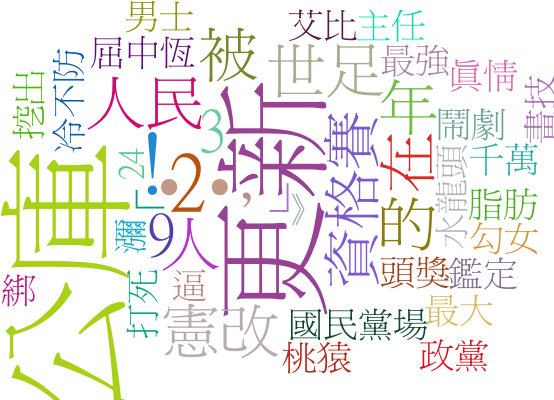

In [96]:
from pytagcloud import create_tag_image, make_tags
from IPython.display import Image
from operator import itemgetter
swd = sorted(worddic.iteritems(), key=itemgetter(1), reverse=True)
swd = [w for w in swd[1:50] if w[0] not in '【】...'.decode('utf-8')]

tags = make_tags(swd, maxsize=120)
create_tag_image(tags, 'wc.png', size=(600,400), fontname='SimHei')
Image(filename='wc.png') 


In [98]:
import requests
from bs4 import BeautifulSoup
import re
import jieba
section = requests.get('http://www.appledaily.com.tw/realtimenews/section/new/1')
soup = BeautifulSoup(section.text)
domain = 'http://www.appledaily.com.tw'
worddic = {}
for news in soup.select('.rtddt'):    
    main = news.select('h1')[0].text
    m = re.match('(.*)\((\d+)\)',main)
    if m:
        title = m.group(1)
        popularity = int(m.group(2))
    for wd in jieba.analyse.extract_tags(title):
        if wd not in worddic:
            worddic[wd] = 1
        else:
            worddic[wd] = worddic[wd] + 1


## 使用pytagcloud

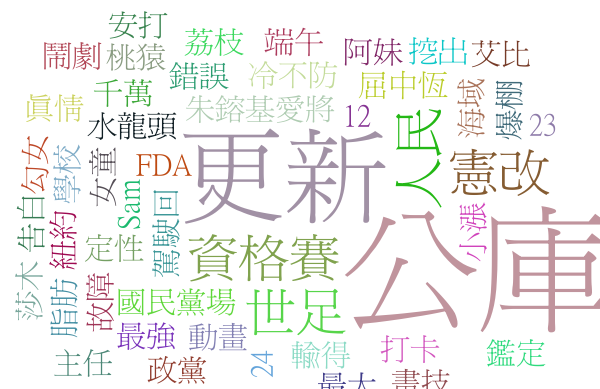

In [100]:
from pytagcloud import create_tag_image, make_tags
from IPython.display import Image
from operator import itemgetter
swd = sorted(worddic.iteritems(), key=itemgetter(1), reverse=True)
swd = [w for w in swd[1:50]]

tags = make_tags(swd, maxsize=120)
create_tag_image(tags, 'wc.png', size=(600,400), fontname='SimHei')
Image(filename='wc.png') 


In [101]:
from pytagcloud import create_tag_image, make_tags
from IPython.display import Image
from operator import itemgetter
swd = sorted(worddic.iteritems(), key=itemgetter(1), reverse=True)
swd = [w for w in swd[1:50]]

[(u'\u516c\u5eab', 7), (u'\u66f4\u65b0', 5), (u'\u4e16\u8db3', 2), (u'\u8cc7\u683c\u8cfd', 2), (u'\u61b2\u6539', 2), (u'\u4eba\u6c11', 2), (u'\u838e\u6728', 1), (u'\u756b\u6280', 1), (u'\u4e3b\u4efb', 1), (u'\u51b7\u4e0d\u9632', 1), (u'\u5b89\u6253', 1), (u'\u52fe\u5973', 1), (u'\u653f\u9ee8', 1), (u'\u570b\u6c11\u9ee8\u5834', 1), (u'\u5c48\u4e2d\u6046', 1), (u'24', 1), (u'\u544a\u767d', 1), (u'\u771f\u60c5', 1), (u'\u6700\u5927', 1), (u'23', 1), (u'\u9451\u5b9a', 1), (u'\u827e\u6bd4', 1), (u'\u8102\u80aa', 1), (u'\u6c34\u9f8d\u982d', 1), (u'\u9b27\u5287', 1), (u'\u6843\u733f', 1), (u'\u6700\u5f37', 1), (u'\u7d10\u7d04', 1), (u'\u6316\u51fa', 1), (u'\u8354\u679d', 1), (u'\u8f38\u5f97', 1), (u'\u6731\u9394\u57fa\u611b\u5c07', 1), (u'\u963f\u59b9', 1), (u'\u7aef\u5348', 1), (u'\u7206\u68da', 1), (u'\u5b78\u6821', 1), (u'12', 1), (u'\u52d5\u756b', 1), (u'\u6253\u5361', 1), (u'\u5c0f\u6f32', 1), (u'Sam', 1), (u'\u6545\u969c', 1), (u'\u5343\u842c', 1), (u'\u932f\u8aa4', 1), (u'\u99d5\u99db\

## 使用 tagcanvas

In [117]:
from IPython.display import display, HTML 

page= '''
  <head>
    <title>Word Cloud</title>
    <script src="tagcanvas.min.js" type="text/javascript"></script>
  </head>
  <body>
    <h1>Word Cloud</h1>
    <div id="myCanvasContainer">
      <canvas width="300" height="300" id="myCanvas">
        <p>Anything in here will be replaced on browsers that support the canvas element</p>
      </canvas>
    </div>
    <div id="tags"><ul id="weightTags">%s</ul></div>
  </body>
'''

js = '''
TagCanvas.Start('myCanvas','weightTags', {
 textFont: null,
 textColour: null,
 weight: true,
 weightMode: 'both',
 textFont: 'Impact,"Arial Black",sans-serif',
 /* more options */
 
});
$('#tags').css('display','None');
'''

import IPython
from IPython.core.display import display_html, display_javascript, Javascript

js_libs = ['tagcanvas.min.js']
li_str = ''
for li in swd:
    li_str += '<li><a data-weight="10" style="font-size: %dex">%s</a></li>'%(li[1] , li[0])
    
display_html(IPython.core.display.HTML(data=page%(li_str)))
display_javascript( Javascript(data=js, lib= js_libs))

Word Cloud 
 
 
 
 Word Cloud 
 
 
 Anything in here will be replaced on browsers that support the canvas element 
 
 
 公庫 更新 世足 資格賽 憲改 人民 莎木 畫技 主任 冷不防 安打 勾女 政黨 國民黨場 屈中恆 24 告白 真情 最大 23 鑑定 艾比 脂肪 水龍頭 鬧劇 桃猿 最強 紐約 挖出 荔枝 輸得 朱鎔基愛將 阿妹 端午 爆棚 學校 12 動畫 打卡 小漲 Sam 故障 千萬 錯誤 駕駛回 海域 女童 FDA 定性

## TF-IDF

In [390]:
import jieba
ary = ['【更新】柯P：洪智坤洩漏公文案還沒看到公文　今處理',
'留洪智坤 柯：殘障求職不易',
'人事處議處洪智坤　柯P：不清楚議處結果']
corpus = []
for title in ary:
    corpus.append(' '.join(jieba.cut(title)))

#jieba.add_word('洪智坤',100, 'nr')

In [392]:
for ele in corpus:
    print ele,

【 更新 】 柯P ： 洪智坤 洩漏 公文 案還 沒 看到 公文 　 今處理 留 洪智坤   柯 ： 殘障 求職 不易 人事 處議 處 洪智坤 　 柯P ： 不 清楚 議處 結果


In [394]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer() 
X = vectorizer.fit_transform(corpus)

word = vectorizer.get_feature_names() 
for w in word:
    print w,
    
print X.transpose().toarray()

不易 人事 今處理 公文 更新 柯p 案還 殘障 求職 洩漏 洪智坤 清楚 看到 結果 處議 議處 [[0 1 0]
 [0 0 1]
 [1 0 0]
 [2 0 0]
 [1 0 0]
 [1 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 1 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [395]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(X)
weight = tfidf.toarray()    
print weight


[[ 0.          0.          0.31738473  0.63476946  0.31738473  0.24137927
   0.31738473  0.          0.          0.31738473  0.18745253  0.
   0.31738473  0.          0.          0.        ]
 [ 0.54645401  0.          0.          0.          0.          0.          0.
   0.54645401  0.54645401  0.          0.32274454  0.          0.          0.
   0.          0.        ]
 [ 0.          0.41074684  0.          0.          0.          0.31238356
   0.          0.          0.          0.          0.2425937   0.41074684
   0.          0.41074684  0.41074684  0.41074684]]


## 計算Cosine Similarity

In [396]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf[0], tfidf).flatten()
print cosine_similarities

[ 1.          0.06049928  0.12087772]


## 列出最相關文章

In [397]:
related_docs_indices = cosine_similarities.argsort()[:-3:-1]
related_docs_indices
for index in related_docs_indices:
    print ary[index]

【更新】柯P：洪智坤洩漏公文案還沒看到公文　今處理
人事處議處洪智坤　柯P：不清楚議處結果


## 分析6/17 新聞內容

In [1]:
from xml.dom import minidom
from xml.etree import ElementTree
import jieba.analyse

f = open('1435449602.xml', 'r')
events=ElementTree.fromstring(f.read())
f.close()
corpus = []
ary= []
src = []
for elem in events.findall('./channel/item'):
    guid = elem.find('guid').text
    title = elem.find('title').text
    description = elem.find('description').text
    pubDate = elem.find('pubDate').text
    source = elem.find('source').text
    src.append(source)
    ary.append(title)
    corpus.append(' '.join(jieba.analyse.extract_tags(description, 20)))
dict1 = {}
for ele in src:    
    dict1[ele] = ele
for ele in dict1.keys():
    print ele

Building prefix dict from C:\Python27\lib\site-packages\jieba\dict.txt ...
DEBUG:jieba:Building prefix dict from C:\Python27\lib\site-packages\jieba\dict.txt ...
Loading model from cache c:\users\david\appdata\local\temp\jieba.cache
DEBUG:jieba:Loading model from cache c:\users\david\appdata\local\temp\jieba.cache
Loading model cost 1.77000021935 seconds.
DEBUG:jieba:Loading model cost 1.77000021935 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


靈匣網
民報
NOWnews
蘋果日報
中央社
時報資訊
中廣新聞網
風傳媒
新頭殼
match生活網


In [26]:
from xml.dom import minidom
from xml.etree import ElementTree
import jieba.analyse

f = open('1435449602.xml', 'r')
events=ElementTree.fromstring(f.read())
f.close()
corpus = []
ary= []
for elem in events.findall('./channel/item'):
    title = elem.find('title').text
    description = elem.find('description').text
    source = elem.find('source').text
    ary.append(title)
    corpus.append(' '.join(jieba.analyse.extract_tags(description, 20)))

In [27]:
for ele in corpus:
    print ele

br 現場 樂園 八仙 檢警 人員 新北市 了解 昨晚 空間 引發 偵辦 已經 這次 活動 粉塵 主辦 地檢署 舞台 士林
醫院 br 病患 受傷 超過 統計 腳部 治療 50 人數 淡水 插管 台北 引發 粉塵要 院長 噴灑 樂園 相當 27
br 櫃員機 希臘 千部 資金 銀行 債務 他們 估計 當局 現金 金供 資金持續 全國 違約 擔心 協調 明顯 業界 三間
br 台鐵 南站 基隆 車站 新車 旅客 北站 完工 啟用 減少 鐵工局 出入口 一分 只要 千度 整建 外觀 必須 總經費
樂園 現場 八仙 粉塵 瞬間 煉獄 新北市 舞台 爆炸 彩色 玉米粉 民眾 人間 遊客 宛如 昨晚 火海 生粉 水上 一樣
基改 法國人 消費者 標示 食品 美食 蘇菲 法國 食材 資訊 超市 成分 東西 很難 態度 含基改 市場 巴黎 食物 基因
因為 醫院 一場 家長 急診室 驚恐 爆炸 病患 意外 進醫院 27 現場 不斷 傷者 傷名 這起 救護車 婦女 樂園 仍待
比賽 艾德蒙 分鐘 岩淵 加拿大 日本 勝球 Cup 真奈 節奏 場雙方 攻進 致勝 強賽 補上 挺進 頓舉行 隊主導 27 分鐘攻
開池 蓋屋 出火 豎柱 納采 移徙 合木 安香 入宅 動土 安門 訂盟 起基 開市 冠笄 好運來 嫁娶 旺旺 拆卸 祈福
br 金曲 江蕙 特別 辛苦 努力 謝謝 強調 機前 因為 時詢問 爺對 其實 還特別 台視 這個獎 獎到 封麥 拿獎 介紹
br 高溫 地區 半部 影響 機會 各地 及東 天氣 指標 暫陣雨 高壓 出現 暫雷陣 過後 天數 山區 等級 炎熱 六月
br 樂園 八仙 28 協助 生粉 27 燙傷 毛治國 傷患 洪秀柱 加強 影響 原訂 運送 活動 鹿野 決定 舉辦 觀光產業
希臘 歐元區 協議 30 達成 救助 公投 瓦魯法 財政部長 債務 一個 逐漸 然後再 爭取 延長 計劃 英國 貨幣 拒絕 經濟
志祥 金曲 表演 蔡依林 26 難免 壓力 台北 看到 巨蛋 舞王 問到羅志祥 台淚 嘉賓 指剛 丟掉 因為 27 獨舞 獎頒獎
專輯 蔡依林 金曲 感動 得獎 國語 最佳 舞曲 真的 開心 26 這張 錦榮 傳訊息 領獎 問到 這麼 典禮 恭喜 台北
br 中資 中國 企業 台灣 掛牌 外資 投資 美國 問題 認為 管理 還是 股權 資金 這些 認定 阿里巴

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer() 
X = vectorizer.fit_transform(corpus)
word = vectorizer.get_feature_names() 


In [29]:
from sklearn.metrics.pairwise import linear_kernel
n_cosine_similarities = linear_kernel(tfidf[0:10], tfidf[0:10])
#print cosine_similarities
print n_cosine_similarities.shape

(10, 10)


In [30]:
related_docs_indices = cosine_similarities.argsort()[:-10:-1]
print related_docs_indices
for index in related_docs_indices:
    print ary[index]

[[  0  81  80 ..., 126 124 146]
 [  0  89  88 ..., 126 116 145]
 [ 73  65  64 ..., 120 113 144]
 ..., 
 [ 73 101  99 ..., 120 135 140]
 [  0  91  92 ..., 131 138 139]
 [  0 102 101 ..., 130 139 138]]


TypeError: only integer arrays with one element can be converted to an index

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(X)
weight = tfidf.toarray() 

In [32]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf, tfidf)
print cosine_similarities.shape

(147, 147)


In [33]:
print tfidf.shape

(147, 1881)


In [35]:
related_docs_indices = cosine_similarities.argsort()[:-10:-1]
related_docs_indices


array([[  0,  81,  80, ..., 126, 124, 146],
       [  0,  89,  88, ..., 126, 116, 145],
       [ 73,  65,  64, ..., 120, 113, 144],
       ..., 
       [ 73, 101,  99, ..., 120, 135, 140],
       [  0,  91,  92, ..., 131, 138, 139],
       [  0, 102, 101, ..., 130, 139, 138]])

In [36]:
from sklearn.metrics.pairwise import linear_kernel
n_cosine_similarities = linear_kernel(tfidf[0:10], tfidf[0:10])
#print cosine_similarities
print n_cosine_similarities.shape

(10, 10)


## 使用 HeatMap 視覺化相似程度

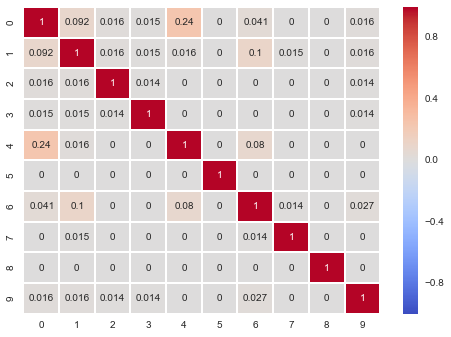

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
# pip install seaborn
sns.heatmap(n_cosine_similarities, annot=True, center=0, cmap='coolwarm')

In [37]:
from sklearn.metrics.pairwise import linear_kernel
n_cosine_similarities = linear_kernel(tfidf, tfidf).flatten()
print cosine_similarities

[[ 1.          0.09167541  0.01601732 ...,  0.0653352   0.          0.        ]
 [ 0.09167541  1.          0.01601694 ...,  0.10915177  0.0173006
   0.01726419]
 [ 0.01601732  0.01601694  1.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.0653352   0.10915177  0.         ...,  1.          0.06651145
   0.01688704]
 [ 0.          0.0173006   0.         ...,  0.06651145  1.          0.17886177]
 [ 0.          0.01726419  0.         ...,  0.01688704  0.17886177  1.        ]]


In [40]:
for ele in ary:
    print ele

八仙塵爆  五相關人依公共危險重傷害法辦
八仙樂園意外 病患持續增加中
希臘國內三分一自動櫃員機現金短缺
台鐵新基隆車站29日正式啟用
6月28日各報頭版要聞
基改不算真食物  法國人知情就不買
八仙樂園舞台大火 逾400人輕重傷
女子世界盃足球賽  日擊敗澳洲晉4強
《農民曆小幫手》國曆六月二十八日
江蕙得「特別貢獻獎」 感恩金曲肯定她
大台北今高溫上探37度
八仙樂園意外 毛揆取消視察臺東行程
歐元區財長拒希臘延長救助計劃
羅志祥哭了 蔡依林讚表現很好
蔡依林淚奪金曲 錦榮傳訊恭喜
風評：陷入獵巫遊戲的中資認定
八仙樂園貼出暫停營業海報
挪威「行動大雕」出沒 隨機射路人
還是熱！西半部高溫達37度
德國即將關閉使用最久核子反應爐
陳奕迅、張惠妹稱王封后  蔡依林抱回最大獎
八仙樂園爆炸案 專家認玉米粉危險性高應管制使用
張娟芬專文：抽絲剝繭邱和順案
2015空姐夏裝大盤點
呂紹煒專欄：違約與退出 希臘與歐洲才能重生(上)
八仙樂園粉塵燃爆 400人傷 負責人被移送
觀點投書：讀中文系的人，應該反對課綱微調
觀點投書：何謂新兵訓練
觀點投書：災難中的護理人
呂政璋觀點：點土成金新思維~以台灣柳丁為例
觀點投書：招搖的進步
中俄美競造5音速機彈
手相看什麼樣的女人性格強勢
面相看哪些人財運綿長不盡
【美洲盃八強】巴西 VS. 巴拉圭 線上直播！
塔羅占卜你今生最看重的是什麼
蘇塞大屠殺 凶手畫面曝光
希臘違約在即  歐盟全力穩定經濟
陳奕迅、莫文蔚伴侶均不知阿娜答金曲獲獎
希臘脫歐變可能 歐洲衝擊大
塔羅占卜你是個有心機的人嗎？
八仙案  新店慈濟4傷者危急
希債協議  法國願盡最後斡旋努力
挑選新鮮食物 大有學問
調心養心 初夏多吃蔬果
夏天吃什麼好 紅棗、苦瓜攏總來
補鈣能手大比拚 牛奶吸收效果好
暑假應考季 小心體內酸鹼失衡
水果中的皇后 草莓多食好處多
旺報觀點－鄭弘儀！別讓台灣人背黑鍋！
古人愛西瓜 清明上河圖可佐證
旺報觀點－紀念抗戰 台日中獲和解轉機
陸官淪陪酒郎 2年10起醉死案
慈禧愛西瓜盅 一天可吃數十個
紀念抗戰 學者：反省、避免戰爭
多位台老兵 受邀赴陸閱兵
陸祭出新規 能上能下整肅官場
首例 馬頒紀念章給新四軍老兵
陸改革遇5瓶頸 難以落實基層
金蟬花替代蟲草 浙民服用中毒
鄭弘儀反紀念抗戰 陸批數典忘祖
《經濟教室》白居易、蘇東坡看加薪


In [41]:
related_docs_indices = cosine_similarities.argsort()[:-10:-1]
print related_docs_indices
for index in related_docs_indices:
    print index

[[  0  81  80 ..., 126 124 146]
 [  0  89  88 ..., 126 116 145]
 [ 73  65  64 ..., 120 113 144]
 ..., 
 [ 73 101  99 ..., 120 135 140]
 [  0  91  92 ..., 131 138 139]
 [  0 102 101 ..., 130 139 138]]
[  0  81  80  79  78  76  75  74  72  71  70  83  68  66  65  64  63  61
  60  59  58  57  54  67  84  85  88 140 139 138 136 135 132 131 129 127
 123 118 117 114 107 106 105 103 101  99  97  96  92  89  53  52  73  50
  28  27  26  25  24  23  22  21  29  51  17  12  10   8   5   4   3   2
  18  30  19  44  34  39  49  43  37  45  46  48  47   7 141  56  77 122
  82  36  42  86  41  91   6 144  93  16   1  11  87 143 113   9  94  69
  33 133  40  32  35 134 130  31 108  55  15  98 112 104  38 109  95 100
 115  90 102 120 137 128 119 110  62 125 111 116  14 121  20 142  13 145
 126 124 146]
[  0  89  88  85  84  83  81  80  79  78  76  75  74  72  71  70  68  67
  66  65  64  63  62  61  60  59  90  58  92  96 140 139 138 136 135 134
 133 131 130 129 127 123 118 117 112 108 107 106 105 104

In [438]:
from sklearn.metrics.pairwise import linear_kernel
n_cosine_similarities = linear_kernel(tfidf, tfidf)
print cosine_similarities

[ 1.  0.  0. ...,  0.  0.  1.]


## 使用PCA 降維資料

In [42]:
#from sklearn import cluster
#c = cluster.KMeans(n_cosine_similarities,3)
#print c.n_clusters

import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
a = pca.fit(n_cosine_similarities)
print len(a)

C:\Python27\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


TypeError: object of type 'PCA' has no len()

In [43]:
from sklearn import cluster
pca = PCA(n_components=2)
pca_data = pca.fit_transform(cosine_similarities)

print pca_data.shape

(147, 2)


In [44]:
print cosine_similarities.shape

(147, 147)


In [45]:
print weight.shape

(147, 1881)


In [50]:
param = [{'model':cluster.KMeans(n_clusters=10),
          'title':'KMeans'}]
c = param[0]['model']
k_data = c.fit_predict(weight)


## 檢視資料與Sum of Square

In [51]:
print k_data.shape
print c.inertia_

(147,)
130.21794048


In [56]:
for id, i in enumerate(k_data):
    if i == 4:
        print ary[id]

#print ary[0]
#print ary[1]
#print ary[3]

台鐵新基隆車站29日正式啟用
八仙樂園舞台大火 逾400人輕重傷
女子世界盃足球賽  日擊敗澳洲晉4強
大台北今高溫上探37度
八仙樂園意外 毛揆取消視察臺東行程
八仙樂園貼出暫停營業海報
還是熱！西半部高溫達37度
八仙樂園粉塵燃爆 400人傷 負責人被移送
歐洲》高貴的徵才條件
東北亞》大眾運輸費變貴了
八仙樂園爆炸 劣賊趁亂打劫
侯友宜探視傷者：追究責任
八仙樂園火警  國軍加入救援
八仙樂園爆炸案災害應變中心　1時30分一級開設
八仙樂園火警受傷名單一覽表
八仙意外毛揆取消台東熱氣球活動
八仙樂園爆炸案 士檢派3檢察官現場指揮
八仙樂園爆炸案 3檢察官展開調查
八仙爆炸案   陳國恩：全力支援
八仙樂園意外 洪秀柱：為傷者祈福
陳國恩指示警方全力動員 協助救護交通順暢
八仙樂園爆炸228人輕重傷 朱立倫：無限期停業
八仙樂園爆炸意外 朱立倫：立即停園接受調查
北榮33名八里傷患  2/3傷重
八仙樂園塵爆215傷　朱立倫下令即刻停業
突尼西亞恐攻 已知15英人遇害
八仙樂園爆炸 朱立倫4點指示
【八仙意外】馬英九、毛治國第一時間得知　指示全
Gap徵小小代言人 艾力克斯親子秀時尚
行動不便為生活當馬伕 首天上班就被逮
【八仙意外】讓專業的來！柯文哲指示啟動EOC
八仙水上樂園爆炸逾百人傷　三軍總醫院收治傷患


## 視覺化呈現分群結果

In [58]:
print pca_data

[[ -4.82892054e-01  -1.20848312e-01]
 [ -3.31142404e-01  -1.19192847e-01]
 [  1.34610908e-01   1.86601595e-01]
 [  1.02922389e-01   1.42994038e-01]
 [ -5.06425207e-01  -9.92628015e-02]
 [  1.26330216e-01   1.61720131e-01]
 [ -3.89858868e-01  -7.33056414e-02]
 [  8.14725884e-02   1.00776437e-01]
 [  1.15130699e-01   1.42930063e-01]
 [  1.68517584e-01  -3.88867681e-02]
 [  1.03240992e-01   1.66763598e-01]
 [ -4.88734424e-01  -1.01991800e-01]
 [  1.70736604e-01   2.55362674e-01]
 [  2.08037230e-01  -3.13014231e-01]
 [  4.34740660e-01  -7.16871002e-01]
 [  1.49657977e-01   1.62001716e-01]
 [ -5.81561390e-01  -1.58725031e-01]
 [  1.04598017e-01   1.47557706e-01]
 [  1.07013227e-01   1.46104427e-01]
 [  1.14682794e-01   1.36403297e-01]
 [  4.46854478e-01  -7.19960993e-01]
 [ -1.77496879e-01   4.12482065e-02]
 [  1.17953887e-01   1.07804844e-01]
 [  1.15130699e-01   1.42930063e-01]
 [  1.17749129e-01   2.26429938e-01]
 [ -5.86662563e-01  -1.55249189e-01]
 [  1.31038638e-01   1.56424403e-01]
 

IndexError: string index out of range

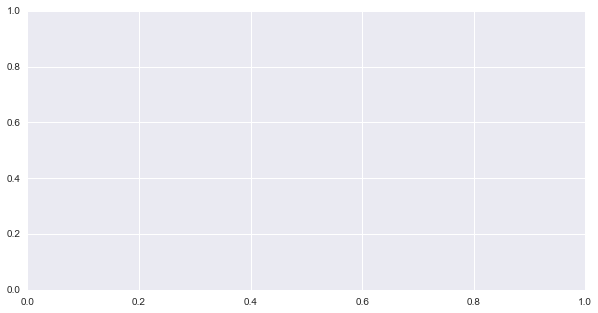

In [59]:
fig, axes = plt.subplots(ncols=1, nrows=1,figsize=(10,5))
axes.scatter(pca_data[:,0], pca_data[:,1], c=['rgbyc'[i] for i in k_data ], s=200)
axes.set_title(param[0]['title'])

In [331]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1)
content = ["How to format my hard disk", " Hard disk format problems "]
X = vectorizer.fit_transform(content)
print vectorizer.get_feature_names()
print(X.toarray().transpose())


[u'disk', u'format', u'hard', u'how', u'my', u'problems', u'to']
[[1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]]


In [338]:
import os

posts = [open(os.path.join('toy/', f)).read() for f in os.listdir('toy')]

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1)

X_train = vectorizer.fit_transform(posts)
num_samples, num_features = X_train.shape

print("#samples: %d, #features: %d" % (num_samples,num_features)) 
print(vectorizer.get_feature_names())


#samples: 5, #features: 25
[u'about', u'actually', u'capabilities', u'contains', u'data', u'databases', u'images', u'imaging', u'interesting', u'is', u'it', u'learning', u'machine', u'most', u'much', u'not', u'permanently', u'post', u'provide', u'safe', u'storage', u'store', u'stuff', u'this', u'toy']


In [339]:
new_post = "imaging databases"
new_post_vec = vectorizer.transform([new_post])
print new_post_vec
print(new_post_vec.toarray())


  (0, 5)	1
  (0, 7)	1
[[0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [342]:
import scipy as sp
def dist_raw(v1, v2):
    delta = v1-v2
    return sp.linalg.norm(delta.toarray())


In [343]:
import sys
best_doc = None
best_dist = sys.maxint
best_i = None
for i in range(0, num_samples):
    post = posts[i]
    if post==new_post:
        continue
    post_vec = X_train.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    print "=== Post %i with dist=%.2f: %s"%(i, d, post)
    if d<best_dist:
        best_dist = d
        best_i = i
print("Best post is %i with dist=%.2f"%(best_i, best_dist))


=== Post 0 with dist=4.00: This is a toy post about machine learning. Actually, it contains not much interesting stuff.
=== Post 1 with dist=1.73: Imaging databases provide storage capabilities.
=== Post 2 with dist=2.00: Most imaging databases safe images permanently.
=== Post 3 with dist=1.41: Imaging databases store data.
=== Post 4 with dist=5.10: Imaging databases store data. Imaging databases store data. Imaging databases store data.
Best post is 3 with dist=1.41


In [344]:
def dist_norm(v1, v2):
    v1_normalized = v1/sp.linalg.norm(v1.toarray())
    v2_normalized = v2/sp.linalg.norm(v2.toarray())
    delta = v1_normalized - v2_normalized
    return sp.linalg.norm(delta.toarray())


In [345]:
vectorizer = CountVectorizer(min_df=1, stop_words='english')
sorted(vectorizer.get_stop_words())[0:10]


['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost']

In [346]:
import nltk.stem
s= nltk.stem.SnowballStemmer('english')
s.stem("graphics")

s.stem("imaging")
s.stem("image")
s.stem("imagination")
s.stem("imagine")



u'imagin'

In [347]:
import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))
vectorizer = StemmedCountVectorizer(min_df=1, stop_words='english')
